0 100
c = [50 50]
[50 50] 1 1 0 1
vf = (20000,) 0.471404520791 70.2392735979


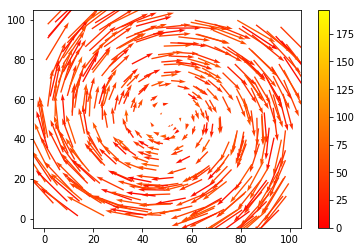

In [2]:
import numpy
from scipy import spatial
import matplotlib.pyplot as plt

import utilsdraw, utilsvfield

d = 1
n = 101 

# create points
points = d*numpy.indices((n,n))
points = [points[d] for d in xrange(2)]
points = numpy.moveaxis(points, 0, -1)
points = points.reshape(-1, points.shape[-1])

print points[:,0].min(), points[:,0].max()

npoints = points.shape[0]

# create a Delaunay triangulation
simplices = spatial.Delaunay(points).simplices
nfaces = simplices.shape[0]

# create PC vector field
centroids = numpy.zeros((nfaces, 2))
for i in xrange(simplices.shape[0]):
    centroids[i] = 1.0/3.0 * (points[simplices[i][0]] + points[simplices[i][1]] + points[simplices[i][2]])

c = numpy.array([(n-1)/2,(n-1)/2])
print 'c =',  c
vf = utilsvfield.create_criticalPoint2D(centroids, numpy.array([(n-1)/2,(n-1)/2]), 1, 1, 0,1)

mvf = numpy.linalg.norm(vf, axis=1)
print 'vf =', mvf.shape, mvf.min(), mvf.max()

plt.figure()
#plt.scatter(points[:,0],points[:,1], c=p, s=60, cmap=plt.cm.jet) #discretize_colormap(plt.cm.jet,3))
#plt.triplot(points[:,0],points[:,1], simplices, '-', alpha=0.2)

vrng = (0, 196.1)
k = 50

utilsdraw.draw_quivers(centroids, vf, vrng, k)
#plt.xlim([-0.1,n-1+0.1])
#plt.ylim([-0.1,n-1+0.1])
plt.show()

In [4]:
from pynhhd import nHHD

hhd = nHHD(points = points, simplices = simplices)
hhd.decompose(vf, True)



     Initializing 2 D mesh with 10201 vertices... 
      got 20000 simplices
     Computing point areas/volumes...  Done!  [[ elapsed time: 0.797 sec. ]]
     Computing adjacent_faces... Done!  [[ elapsed time: 0.082 sec. ]]
     Computing across_edge...  Done!  [[ elapsed time: 0.392 sec. ]]
     Computing the boundary...  Done! found 400 boundary edges  [[ elapsed time: 0.059 sec. ]]
 Done!  [[ elapsed time: 1.336 sec. ]]
PoissonSolver 2 D points = (10201, 2)

Initializing Poisson solver, type = S
  - created pairwise distance matrix: (10201, 10201) 1e-10 141.421356237  [[ elapsed time: 2.357 sec. ]]
  - computing the Green's function: (10201, 10201) -3.6646779944 0.788094498918  [[ elapsed time: 0.775 sec. ]]
Poisson solver initialized  [[ elapsed time: 3.133 sec. ]]

 ==> nhhd.decompose (20000, 2)
div = (10201,) -0.166666666667 0.166666666667
curlw = (10201,) -2.66666666667 67.0

Solving Poisson Eq.
Poisson solver finished  [[ elapsed time: 0.034 sec. ]]
nD = (10201,) -0.4203921451

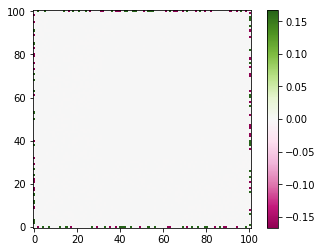

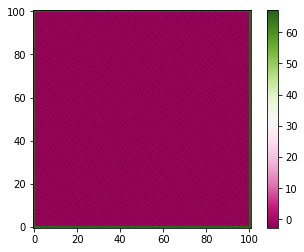

In [5]:
plt.figure()
plt.imshow(hhd.div.reshape(n,n),origin='lower',cmap=plt.cm.PiYG) #,vmax=numpy.abs(n).max(), vmin=-numpy.abs(n).max())
plt.xlim([-0.5,n-1+0.5])
plt.ylim([-0.5,n-1+0.5])
plt.colorbar()

plt.figure()
plt.imshow(hhd.curlw.reshape(n,n),origin='lower',cmap=plt.cm.PiYG) #,vmax=numpy.abs(n).max(), vmin=-numpy.abs(n).max())
plt.xlim([-0.5,n-1+0.5])
plt.ylim([-0.5,n-1+0.5])
plt.colorbar()

plt.show()

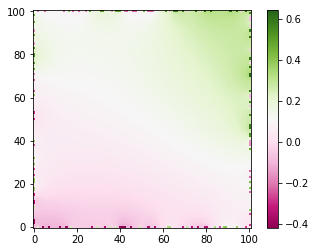

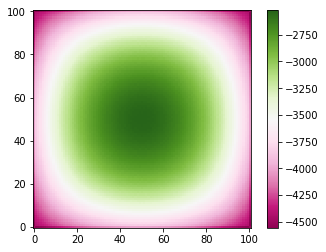

In [6]:
plt.figure()
plt.imshow(hhd.nD.reshape(n,n),origin='lower',cmap=plt.cm.PiYG) #,vmax=numpy.abs(n).max(), vmin=-numpy.abs(n).max())
plt.xlim([-0.5,n-1+0.5])
plt.ylim([-0.5,n-1+0.5])
plt.colorbar()

plt.figure()
plt.imshow(hhd.nRu.reshape(n,n),origin='lower',cmap=plt.cm.PiYG) #,vmax=numpy.abs(n).max(), vmin=-numpy.abs(n).max())
plt.xlim([-0.5,n-1+0.5])
plt.ylim([-0.5,n-1+0.5])
plt.colorbar()


plt.show()

vf = (20000,) 0.471404520791 70.2392735979
d = 6.3634002115e-05 0.459513657034
r = 0.124055589643 196.096821569
h = 0.0284453785727 143.959061465


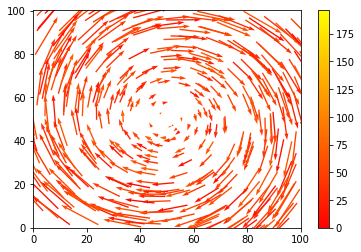

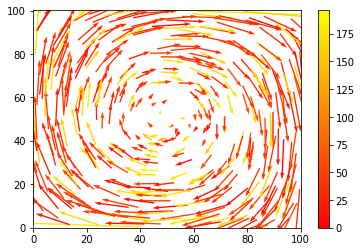

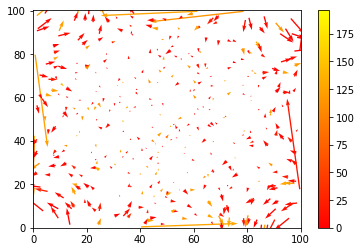

In [7]:

# ----------------------------------------------------------------
mvf = numpy.linalg.norm(vf, axis=1)
print 'vf =', mvf.shape, mvf.min(), mvf.max()

mr = numpy.linalg.norm(hhd.r, axis=1)
md = numpy.linalg.norm(hhd.d, axis=1)
mh = numpy.linalg.norm(hhd.h, axis=1)

print 'd =', md.min(), md.max() #, numpy.linalg.norm(md)
print 'r =', mr.min(), mr.max() #, numpy.linalg.norm(mr)
print 'h =', mh.min(), mh.max() #, numpy.linalg.norm(mh)

#vrng = (0, 196.1)
vrng = (0, 196.1)
k = 50
# ----------------------------------------------------------------

plt.figure()
#plt.scatter(points[:,0],points[:,1], c=p, s=60, cmap=plt.cm.jet) #discretize_colormap(plt.cm.jet,3))
#plt.triplot(points[:,0],points[:,1], simplices, '-', alpha=0.2)

utilsdraw.draw_quivers(centroids, vf, vrng, k)
plt.xlim([-0.1,n-1+0.1])
plt.ylim([-0.1,n-1+0.1])
#plt.savefig('fig1.png')

# ----------------------------------------------------------------

plt.figure()
utilsdraw.draw_quivers(centroids, hhd.r, vrng, k)
#plt.imshow(hhd.nD.reshape(n,n),origin='lower',cmap=plt.cm.PiYG) #,vmax=numpy.abs(n).max(), vmin=-numpy.abs(n).max())
plt.xlim([-0.1,n-1+0.1])
plt.ylim([-0.1,n-1+0.1])

#plt.savefig('fig2.png')

plt.figure()
utilsdraw.draw_quivers(centroids, hhd.h, vrng, k)
plt.xlim([-0.1,n-1+0.1])
plt.ylim([-0.1,n-1+0.1])
#plt.savefig('fig3.png')

plt.show()
